<a href="https://colab.research.google.com/github/math-maven/introduction2pytorch/blob/main/introduction_to_pytorch_05_creating_a_simple_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root = '/content/data', download =True,train=True,transform = transform  )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32,shuffle =True)

In [ ]:
test_dataset = torchvision.datasets.MNIST(root = '/content/data', download =True,train=False,transform = transform  )
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32,shuffle =False)

100%|██████████| 9912422/9912422 [00:00<00:00, 111597967.63it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 94859587.96it/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 143337507.44it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 12435071.00it/s]

Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



(28,28) >(784) .... 784*(784,128)>128 , 128 *(128,10) >10

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.Sigmoid(),
        )
    def forward(self,x):
        outputs = self.layers(x)
        return outputs

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,784),
        nn.Unflatten(1,(1,28,28)),
        )
    def forward(self,x):
        outputs = self.layers(x)
        return outputs


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    def forward(self,x):
        code = self.encoder(x)
        outputs = self.decoder(code)

        return outputs




In [ ]:
model = AutoEncoder()
model.to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
num_epochs =2
for epoch in range(num_epochs):
    for i,(images ,_) in enumerate(train_loader) :
        images = images.to(device)
        outputs = model(images)
        loss = loss_fn(outputs,images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(f"epoch: {epoch} , batch {i} : loss :{loss}")



epoch: 0 , batch 0 : loss :0.21268408000469208
epoch: 0 , batch 100 : loss :0.04855576157569885
epoch: 0 , batch 200 : loss :0.03663240373134613
epoch: 0 , batch 300 : loss :0.0302316602319479
epoch: 0 , batch 400 : loss :0.033064696937799454
epoch: 0 , batch 500 : loss :0.028079435229301453
epoch: 0 , batch 600 : loss :0.02473035827279091
epoch: 0 , batch 700 : loss :0.02216392569243908
epoch: 0 , batch 800 : loss :0.02253584749996662
epoch: 0 , batch 900 : loss :0.025533851236104965
epoch: 0 , batch 1000 : loss :0.023893801495432854
epoch: 0 , batch 1100 : loss :0.023051047697663307
epoch: 0 , batch 1200 : loss :0.022076699882745743
epoch: 0 , batch 1300 : loss :0.02488076500594616
epoch: 0 , batch 1400 : loss :0.022579548880457878
epoch: 0 , batch 1500 : loss :0.02418619766831398
epoch: 0 , batch 1600 : loss :0.020699309185147285
epoch: 0 , batch 1700 : loss :0.020692581310868263
epoch: 0 , batch 1800 : loss :0.022844457998871803
epoch: 1 , batch 0 : loss :0.02012590691447258
epoch:

KeyboardInterrupt: ignored

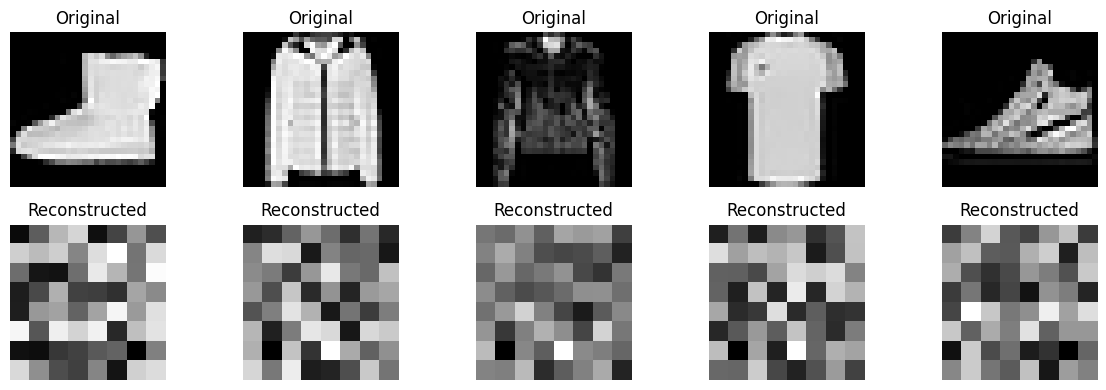

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode (important for batch normalization and dropout)
model.eval()

# Choose 5 random samples from your training dataset
num_samples = 5
sample_indices = np.random.randint(0, len(train_dataset), num_samples)

# Create subplots to display the original images and their reconstructions
fig, axes = plt.subplots(2, num_samples, figsize=(12, 4))

with torch.no_grad():
    for i, idx in enumerate(sample_indices):
        input_image, _ = train_dataset[idx]  # Assuming train_dataset contains (image, label) pairs
        # input_image = torch.rand_like(input_image)
        input_image = input_image.unsqueeze(0)  # Add batch dimension
        input_image = input_image.to(device)
        reconstructed_image = model.encoder(input_image)  # Pass the input through the autoencoder
        input_image = input_image.squeeze(0)  # Remove batch dimension
        #reconstructed_image = reconstructed_image.squeeze(0)
        reconstructed_image = reconstructed_image.reshape(1,8,8)

        # Plot original image
        axes[0, i].imshow(input_image[0].cpu(), cmap='gray')
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        # Plot reconstructed image
        axes[1, i].imshow(reconstructed_image[0].cpu(), cmap='gray')
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

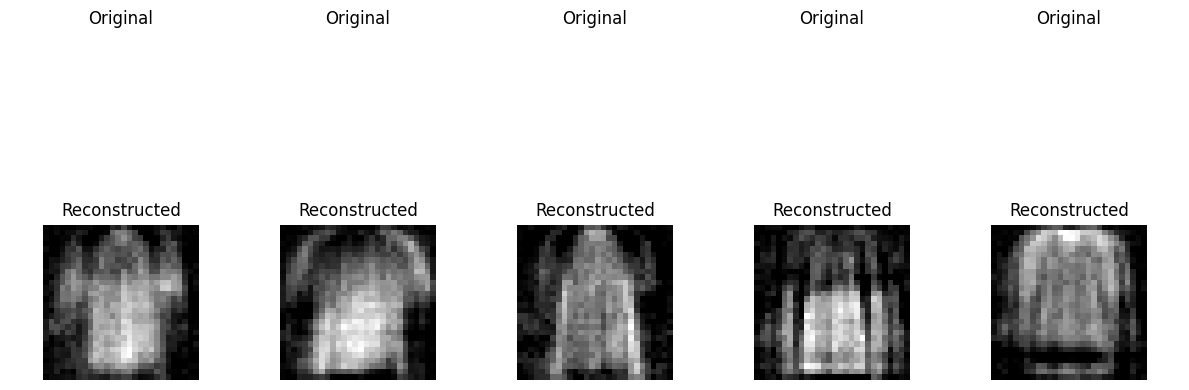

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode (important for batch normalization and dropout)
model.eval()

# Choose 5 random samples from your training dataset
num_samples = 5
sample_indices = np.random.randint(0, len(train_dataset), num_samples)

# Create subplots to display the original images and their reconstructions
fig, axes = plt.subplots(2, num_samples, figsize=(12, 4))

with torch.no_grad():
    for i, idx in enumerate(sample_indices):
        input_image, _ = train_dataset[idx]  # Assuming train_dataset contains (image, label) pairs
        input_image = torch.rand(64)
        input_image = input_image.unsqueeze(0)  # Add batch dimension
        input_image = input_image.to(device)
        reconstructed_image = model.decoder(input_image)  # Pass the input through the autoencoder
        input_image = input_image.squeeze(0)  # Remove batch dimension
        reconstructed_image = reconstructed_image.squeeze(0)
        # print(reconstructed_image.shape)
        # reconstructed_image = reconstructed_image.reshape(1,28,28)

        # Plot original image
        # axes[0, i].imshow(input_image[0].cpu(), cmap='gray')
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')
        reconstructed_image = torch.clip(reconstructed_image,0,1)
        # Plot reconstructed image
        axes[1, i].imshow(reconstructed_image[0].cpu(), cmap='gray')
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()